In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(
    'creditcard.csv'
)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We are most interested in the recall score for this data set. It is the metric that helps us to capture the most fraudulent transactions. High Recall scores ensure Below are formulas for Accuracy, Precision and Recall:

Accuracy = (TP+TN)/total

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)


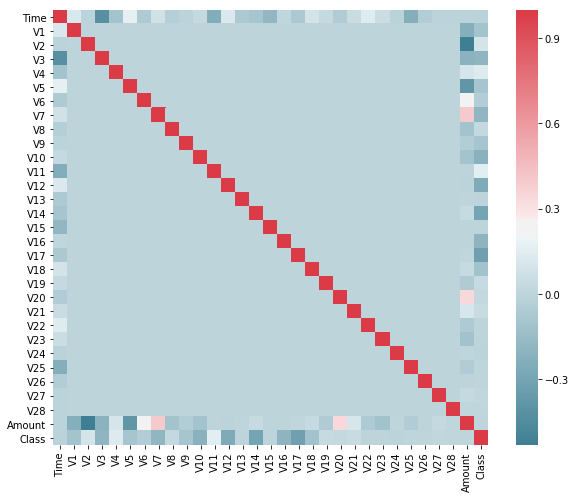

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [5]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, : -1]
y = df.iloc[:, -1]
X.drop('Time', axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [7]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
224632,2.154340,-0.557658,-1.017641,-0.556887,-0.795108,-1.026477,-0.851005,-0.196385,-0.066308,0.055515,...,0.053111,0.247468,0.887901,0.111774,-0.088270,-0.131311,-0.086357,0.040280,-0.012185,5.95
144857,1.991283,0.232967,-1.518553,1.286306,0.487592,-0.864960,0.565007,-0.301137,-0.128716,0.416781,...,-0.277409,0.108684,0.540879,-0.003974,0.035074,0.433506,-0.513001,-0.014436,-0.071416,2.83
210581,2.017727,0.017121,-3.413577,0.129556,3.141497,2.988440,0.274226,0.545435,-0.357127,0.393959,...,-0.162430,0.185227,0.486681,-0.045034,0.713508,0.591599,-0.397269,-0.023108,-0.069086,29.00
147032,0.989469,-1.658779,-2.091819,0.796545,-0.532269,-0.798252,0.614555,-0.199738,0.845344,-0.881714,...,0.779772,0.110980,-0.633261,-0.241100,-0.097730,-0.337931,-0.158752,-0.108549,0.054555,513.41
257552,2.123961,0.759229,-3.259839,0.663429,1.419310,-1.519307,0.880918,-0.523507,-0.094020,-1.071213,...,-0.064493,-0.072915,0.040714,-0.077467,0.430587,0.457529,0.688236,-0.076162,-0.012964,0.76


In [8]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
264521,-2.218317,0.839557,-0.937509,-1.032425,1.113413,-1.712079,1.141005,-0.128076,-0.021718,0.661511,...,-0.043738,0.030506,0.614023,-0.938602,0.101549,0.439763,0.201189,0.421303,-0.148598,32.82
99796,0.936970,-2.028695,0.551059,-1.069200,-2.175695,-0.645941,-0.933984,-0.196019,-1.566421,1.286472,...,0.270207,0.170117,0.267721,-0.286609,0.409274,0.265822,-0.077778,0.001301,0.077779,301.00
8080,1.259835,-0.196615,0.467977,0.162764,-0.575144,-0.386814,-0.518503,-0.076230,2.004495,-0.488220,...,-0.097335,-0.123770,-0.212120,-0.122714,-0.475957,0.262548,1.085564,-0.104039,-0.001713,39.00
52765,-0.579485,-0.759250,1.975249,-1.603209,-1.721273,-0.116890,0.279403,-0.329269,-2.593351,1.463932,...,-0.111782,-0.284373,-0.268511,0.325828,0.483022,-0.346609,-0.388648,-0.060209,-0.175501,177.70
184130,-0.464108,1.017047,-0.267107,0.025765,1.335761,-0.058346,0.784170,-0.063742,-0.088733,-0.686693,...,0.211073,0.056100,0.519566,-0.481601,0.034698,0.237799,0.908572,0.234620,0.216574,11.50


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train['Amount'] = sc_x.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = sc_x.transform(X_test['Amount'].values.reshape(-1,1))
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
224632,2.154340,-0.557658,-1.017641,-0.556887,-0.795108,-1.026477,-0.851005,-0.196385,-0.066308,0.055515,...,0.053111,0.247468,0.887901,0.111774,-0.088270,-0.131311,-0.086357,0.040280,-0.012185,-0.329813
144857,1.991283,0.232967,-1.518553,1.286306,0.487592,-0.864960,0.565007,-0.301137,-0.128716,0.416781,...,-0.277409,0.108684,0.540879,-0.003974,0.035074,0.433506,-0.513001,-0.014436,-0.071416,-0.342333
210581,2.017727,0.017121,-3.413577,0.129556,3.141497,2.988440,0.274226,0.545435,-0.357127,0.393959,...,-0.162430,0.185227,0.486681,-0.045034,0.713508,0.591599,-0.397269,-0.023108,-0.069086,-0.237315
147032,0.989469,-1.658779,-2.091819,0.796545,-0.532269,-0.798252,0.614555,-0.199738,0.845344,-0.881714,...,0.779772,0.110980,-0.633261,-0.241100,-0.097730,-0.337931,-0.158752,-0.108549,0.054555,1.706584
257552,2.123961,0.759229,-3.259839,0.663429,1.419310,-1.519307,0.880918,-0.523507,-0.094020,-1.071213,...,-0.064493,-0.072915,0.040714,-0.077467,0.430587,0.457529,0.688236,-0.076162,-0.012964,-0.350640


In [11]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
264521,-2.218317,0.839557,-0.937509,-1.032425,1.113413,-1.712079,1.141005,-0.128076,-0.021718,0.661511,...,-0.043738,0.030506,0.614023,-0.938602,0.101549,0.439763,0.201189,0.421303,-0.148598,-0.221985
99796,0.936970,-2.028695,0.551059,-1.069200,-2.175695,-0.645941,-0.933984,-0.196019,-1.566421,1.286472,...,0.270207,0.170117,0.267721,-0.286609,0.409274,0.265822,-0.077778,0.001301,0.077779,0.854200
8080,1.259835,-0.196615,0.467977,0.162764,-0.575144,-0.386814,-0.518503,-0.076230,2.004495,-0.488220,...,-0.097335,-0.123770,-0.212120,-0.122714,-0.475957,0.262548,1.085564,-0.104039,-0.001713,-0.197186
52765,-0.579485,-0.759250,1.975249,-1.603209,-1.721273,-0.116890,0.279403,-0.329269,-2.593351,1.463932,...,-0.111782,-0.284373,-0.268511,0.325828,0.483022,-0.346609,-0.388648,-0.060209,-0.175501,0.359407
184130,-0.464108,1.017047,-0.267107,0.025765,1.335761,-0.058346,0.784170,-0.063742,-0.088733,-0.686693,...,0.211073,0.056100,0.519566,-0.481601,0.034698,0.237799,0.908572,0.234620,0.216574,-0.307541


In [12]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print('There is an obvious problem with an unbalanced dataset here!')

Before OverSampling, counts of label '1': 402
Before OverSampling, counts of label '0': 227443 

There is an obvious problem with an unbalanced dataset here!


In [13]:
#Use SMOTE to balance the data set
sm = SMOTE(random_state=42)
X_train_smoted, y_train_smoted = sm.fit_sample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smoted == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smoted == 0)))

After OverSampling, counts of label '1': 227443
After OverSampling, counts of label '0': 227443


In [14]:
X_train = pd.DataFrame(X_train_smoted, columns=X.columns)
y_train = y_train_smoted

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
#Try Random Forest
from sklearn.metrics import confusion_matrix, recall_score
from sklearn import ensemble
#Params = {'n_estimators': 50, 'min_samples_split': 10}
rfc = ensemble.RandomForestClassifier(n_estimators = 20, min_samples_split = 10)

Recall metric in the train dataset: 1.0


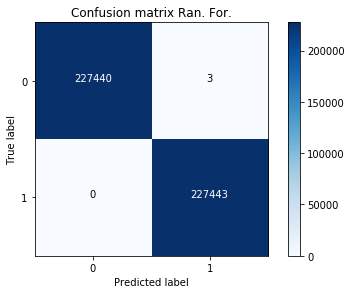

In [17]:
rfc.fit(X_train, y_train.ravel())
y_train_pre = rfc.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}".format(cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix Ran. For.')
plt.show()

Recall metric in the testing dataset: 0.8555555555555555


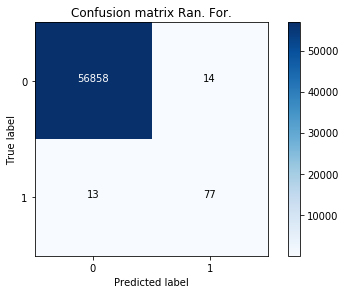

clearly there is an over-fitting issue


In [18]:
y_pre = rfc.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}".format(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix Ran. For.')
plt.show()
print('clearly there is an over-fitting issue')

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.8min finished


[LibLinear]Recall metric in the train dataset: 0.9184411039249394


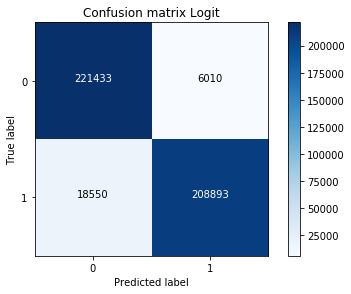

In [19]:
#Try Logit Classifier
from sklearn.linear_model import LogisticRegressionCV
LR = LogisticRegressionCV(Cs=5, verbose = 5, penalty='l1', scoring = 'recall', solver = 'liblinear', n_jobs = -1)
LR.fit(X_train, y_train.ravel())

y_train_pre = LR.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}".format(cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix Logit')
plt.show()


Recall metric in the testing dataset: 0.9333333333333333


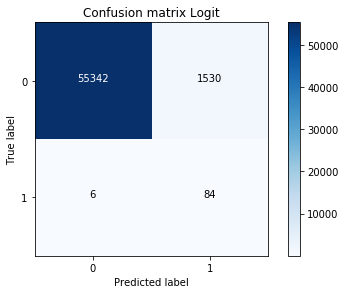

In [20]:
y_pre = LR.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}".format(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix Logit')
plt.show()

In [21]:
#Try kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=20, weights='distance')
neighbors.fit(X_train, y_train.ravel())
#Cannot run properly..

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance')

In [ ]:
#Try SVM Classifier
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

#also cannot run properly